<a href="https://colab.research.google.com/github/aaraszewska/F1-Race-Performance-Analysis-Driver-Insights-/blob/main/Copy_of_F1_Race_Performance_Analysis_%26_Driver_Insights_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Phase 1: Data Collection
Primary Data Sources:

Ergast API (historical race data, lap times, driver standings)

OpenF1 API (real-time telemetry, driver stats, race results)

Formula 1 Website: For additional stats and current race results (scraping with BeautifulSoup/Selenium)





 Step 1: Install & Import Required Libraries

In [1]:
import requests  # For API calls
import pandas as pd  # For data processing
import json  # For handling JSON data


# Round 1 (Bahrain GP) in 2024.

In [2]:
# API endpoint for Bahrain Grand Prix 2024 (Round 1)
url = "https://ergast.com/api/f1/2024/1/results.json"

# Make the API request
response = requests.get(url)

# Convert the response to JSON
data = response.json()

# Pretty-print the JSON (optional)
print(json.dumps(data, indent=4))


{
    "MRData": {
        "xmlns": "http://ergast.com/mrd/1.5",
        "series": "f1",
        "url": "http://ergast.com/api/f1/2024/1/results.json",
        "limit": "30",
        "offset": "0",
        "total": "20",
        "RaceTable": {
            "season": "2024",
            "round": "1",
            "Races": [
                {
                    "season": "2024",
                    "round": "1",
                    "url": "https://en.wikipedia.org/wiki/2024_Bahrain_Grand_Prix",
                    "raceName": "Bahrain Grand Prix",
                    "Circuit": {
                        "circuitId": "bahrain",
                        "url": "http://en.wikipedia.org/wiki/Bahrain_International_Circuit",
                        "circuitName": "Bahrain International Circuit",
                        "Location": {
                            "lat": "26.0325",
                            "long": "50.5106",
                            "locality": "Sakhir",
                       

 # Extract Useful Data & Convert to DataFrame

In [3]:
# Extract race data
races = data['MRData']['RaceTable']['Races']

# Check if race data is available
if races:
    race_results = races[0]['Results']  # Get race results

    # Create a DataFrame with useful data
    df = pd.DataFrame([
        {
            'Position': result['position'],
            'Driver': f"{result['Driver']['givenName']} {result['Driver']['familyName']}",
            'Constructor': result['Constructor']['name'],
            'Time': result.get('Time', {}).get('time', 'N/A'),  # Some drivers may not have a time
            'Points': result['points']
        }
        for result in race_results
    ])

    # Display the first few rows
    print(df.head())
else:
    print("No race data available.")


  Position           Driver Constructor         Time Points
0        1   Max Verstappen    Red Bull  1:31:44.742     26
1        2     Sergio Pérez    Red Bull      +22.457     18
2        3     Carlos Sainz     Ferrari      +25.110     15
3        4  Charles Leclerc     Ferrari      +39.669     12
4        5   George Russell    Mercedes      +46.788     10


# Save Data to CSV

In [4]:
df.to_csv('f1_race_results.csv', index=False)


<ipython-input-5-8b7e94a18bd4>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Points', y='Driver', data=df_sorted, palette='magma')


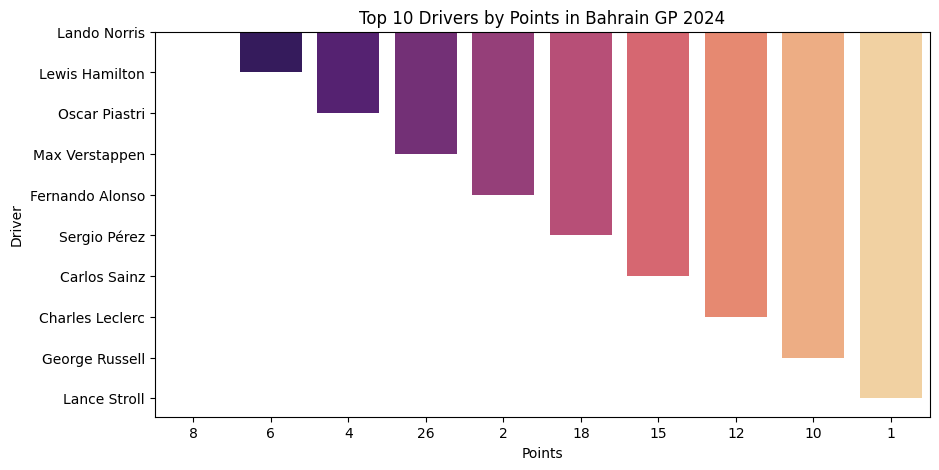

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort data by points
df_sorted = df.sort_values(by='Points', ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x='Points', y='Driver', data=df_sorted, palette='magma')
plt.xlabel("Points")
plt.ylabel("Driver")
plt.title("Top 10 Drivers by Points in Bahrain GP 2024")
plt.show()


 # Fetch Lap Times for a Specific Race

In [6]:
# Define API endpoint for lap times
lap_times_url = "https://ergast.com/api/f1/2024/1/laps.json"

# Fetch lap times
response = requests.get(lap_times_url)
lap_data = response.json()

# Print JSON structure (optional)
print(json.dumps(lap_data, indent=4))


{
    "MRData": {
        "xmlns": "http://ergast.com/mrd/1.5",
        "series": "f1",
        "url": "http://ergast.com/api/f1/2024/1/laps.json",
        "limit": "30",
        "offset": "0",
        "total": "1129",
        "RaceTable": {
            "season": "2024",
            "round": "1",
            "Races": [
                {
                    "season": "2024",
                    "round": "1",
                    "url": "https://en.wikipedia.org/wiki/2024_Bahrain_Grand_Prix",
                    "raceName": "Bahrain Grand Prix",
                    "Circuit": {
                        "circuitId": "bahrain",
                        "url": "http://en.wikipedia.org/wiki/Bahrain_International_Circuit",
                        "circuitName": "Bahrain International Circuit",
                        "Location": {
                            "lat": "26.0325",
                            "long": "50.5106",
                            "locality": "Sakhir",
                        

Extract & Structure Lap Time Data

In [7]:
# Extract lap time data
races = lap_data['MRData']['RaceTable']['Races']

if races:
    laps = races[0]['Laps']  # Get lap data

    # Convert to DataFrame
    lap_df = pd.DataFrame([
        {
            'Lap': lap['number'],
            'Driver': f"{timing['driverId']}",
            'Lap Time': timing['time']
        }
        for lap in laps
        for timing in lap['Timings']
    ])

    # Display first few rows
    print(lap_df.head())

else:
    print("No lap time data available.")


  Lap          Driver  Lap Time
0   1  max_verstappen  1:37.284
1   1         leclerc  1:38.271
2   1         russell  1:39.228
3   1           perez  1:40.053
4   1           sainz  1:40.620


 Fetch Pit Stop Data

In [8]:
# Define API endpoint for pit stops
pit_stop_url = "https://ergast.com/api/f1/2024/1/pitstops.json"

# Fetch pit stop data
response = requests.get(pit_stop_url)
pit_data = response.json()

# Print JSON structure (optional)
print(json.dumps(pit_data, indent=4))


{
    "MRData": {
        "xmlns": "http://ergast.com/mrd/1.5",
        "series": "f1",
        "url": "http://ergast.com/api/f1/2024/1/pitstops.json",
        "limit": "30",
        "offset": "0",
        "total": "43",
        "RaceTable": {
            "season": "2024",
            "round": "1",
            "Races": [
                {
                    "season": "2024",
                    "round": "1",
                    "url": "https://en.wikipedia.org/wiki/2024_Bahrain_Grand_Prix",
                    "raceName": "Bahrain Grand Prix",
                    "Circuit": {
                        "circuitId": "bahrain",
                        "url": "http://en.wikipedia.org/wiki/Bahrain_International_Circuit",
                        "circuitName": "Bahrain International Circuit",
                        "Location": {
                            "lat": "26.0325",
                            "long": "50.5106",
                            "locality": "Sakhir",
                      

In [9]:
# Extract pit stop data
races = pit_data['MRData']['RaceTable']['Races']

if races:
    pit_stops = races[0]['PitStops']  # Get pit stop data

    # Convert to DataFrame
    pit_df = pd.DataFrame([
        {
            'Driver': stop['driverId'],
            'Lap': stop['lap'],
            'Stop': stop['stop'],
            'Duration': stop['duration']
        }
        for stop in pit_stops
    ])

    # Display first few rows
    print(pit_df.head())

else:
    print("No pit stop data available.")


       Driver Lap Stop Duration
0  hulkenberg   1    1   36.604
1        zhou   9    1   25.208
2      stroll   9    1   24.418
3        ocon  10    1   24.877
4    sargeant  10    1   35.729


<ipython-input-11-1fa0804cf0da>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Duration', y='Driver', data=pit_df, palette='coolwarm')


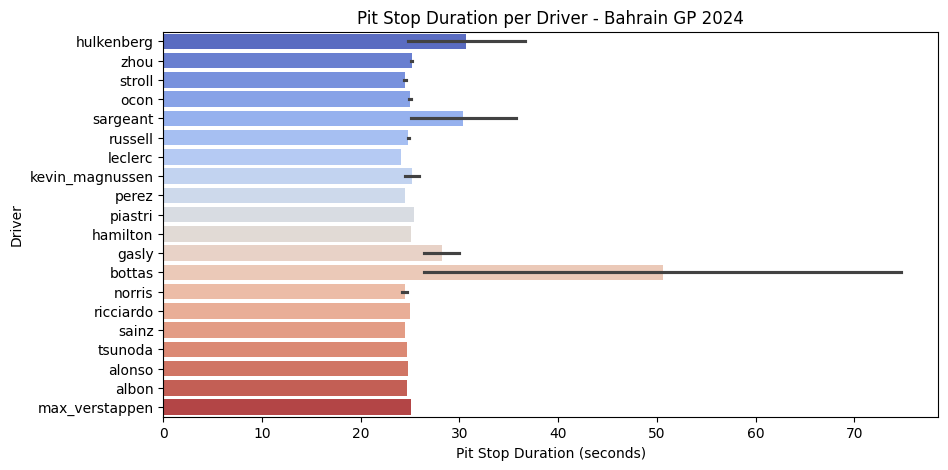

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert '1:14.773' to total seconds
def convert_to_seconds(time_str):
    if ':' in time_str:
        minutes, seconds = time_str.split(':')
        return float(minutes) * 60 + float(seconds)
    return float(time_str)  # if already in seconds

# Apply conversion
pit_df['Duration'] = pit_df['Duration'].apply(convert_to_seconds)

# Plot Pit Stop Duration per Driver
plt.figure(figsize=(10, 5))
sns.barplot(x='Duration', y='Driver', data=pit_df, palette='coolwarm')
plt.xlabel("Pit Stop Duration (seconds)")
plt.ylabel("Driver")
plt.title("Pit Stop Duration per Driver - Bahrain GP 2024")
plt.show()


 # Compare Pit Stop Strategies Between Teams

In [14]:
print(pit_df.columns)


Index(['Driver', 'Lap', 'Stop', 'Duration'], dtype='object')


In [15]:
import requests
import pandas as pd

# 1. Get results data for Bahrain GP 2024 (Round 1)
url = "http://ergast.com/api/f1/2024/1/results.json"
response = requests.get(url)
results_data = response.json()

# 2. Extract driver -> team mapping
results = results_data['MRData']['RaceTable']['Races'][0]['Results']
team_data = []

for result in results:
    driver_name = result['Driver']['familyName']
    team_name = result['Constructor']['name']
    team_data.append({'Driver': driver_name, 'Team': team_name})

# 3. Create team DataFrame and merge with pit_df
team_df = pd.DataFrame(team_data)
pit_df = pd.merge(pit_df, team_df, on='Driver', how='left')


In [22]:
# Check for any discrepancies in Driver names (case-sensitive check)
print(pit_df['Driver'].unique())
print(team_df['Driver'].unique())

# Strip any spaces from Driver names to avoid mismatches
pit_df['Driver'] = pit_df['Driver'].str.strip()
team_df['Driver'] = team_df['Driver'].str.strip()

# Now try merging again
pit_df = pd.merge(pit_df, team_df[['Driver', 'Team']], on='Driver', how='left')

# Check the result of the merge
print(pit_df.head())


['hulkenberg' 'zhou' 'stroll' 'ocon' 'sargeant' 'russell' 'leclerc'
 'kevin_magnussen' 'perez' 'piastri' 'hamilton' 'gasly' 'bottas' 'norris'
 'ricciardo' 'sainz' 'tsunoda' 'alonso' 'albon' 'max_verstappen']
['Verstappen' 'Pérez' 'Sainz' 'Leclerc' 'Russell' 'Norris' 'Hamilton'
 'Piastri' 'Alonso' 'Stroll' 'Zhou' 'Magnussen' 'Ricciardo' 'Tsunoda'
 'Albon' 'Hülkenberg' 'Ocon' 'Gasly' 'Bottas' 'Sargeant']


MergeError: Passing 'suffixes' which cause duplicate columns {'Team_x'} is not allowed.

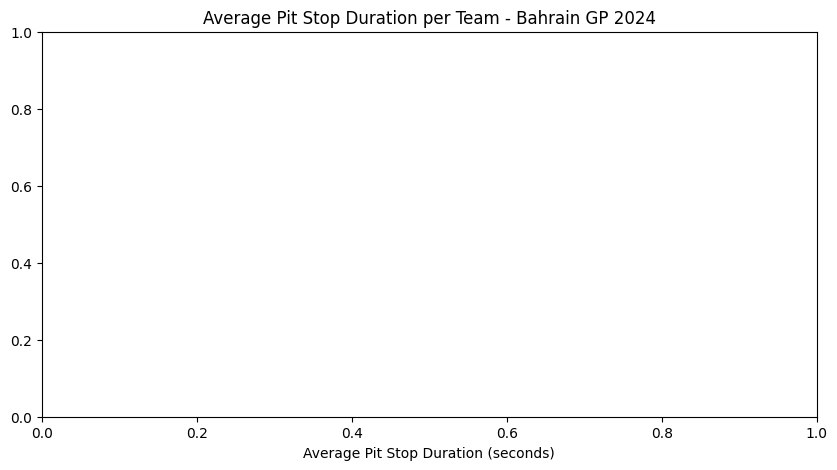

In [21]:
# Group by 'Team' and calculate the average duration
team_pit_stats = pit_df.groupby('Team')['Duration'].mean().sort_values()

# Plot the results
plt.figure(figsize=(10, 5))
sns.barplot(x=team_pit_stats.values, y=team_pit_stats.index, palette='viridis')
plt.xlabel('Average Pit Stop Duration (seconds)')
plt.title('Average Pit Stop Duration per Team - Bahrain GP 2024')
plt.show()
